## Bibliotecas

In [56]:
#Auto complete
%config IPCompleter.greedy=True
from IPython import get_ipython
import warnings
warnings.filterwarnings('ignore')

#Imporando das Bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random 

In [57]:
#Regressão
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

### Análise Exploratória dos Dados

In [58]:
#Carregamento do csv
df = pd.read_csv('dados.csv')

In [59]:
# Total de linhas e colunas
df.shape

(48894, 16)

In [60]:
#Verificação dos dados faltantes
df.isna().sum() 

id                                   0
nome                                16
host_id                              0
host_name                           21
bairro_group                         0
bairro                               0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimo_noites                        0
numero_de_reviews                    0
ultima_review                    10052
reviews_por_mes                  10052
calculado_host_listings_count        0
disponibilidade_365                  0
dtype: int64

In [61]:
#Verificar se existe registros duplicados
df.id.duplicated().sum()

0

In [62]:
#Descrição dos atributos por tipo
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48894 entries, 0 to 48893
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             48894 non-null  int64  
 1   nome                           48878 non-null  object 
 2   host_id                        48894 non-null  int64  
 3   host_name                      48873 non-null  object 
 4   bairro_group                   48894 non-null  object 
 5   bairro                         48894 non-null  object 
 6   latitude                       48894 non-null  float64
 7   longitude                      48894 non-null  float64
 8   room_type                      48894 non-null  object 
 9   price                          48894 non-null  int64  
 10  minimo_noites                  48894 non-null  int64  
 11  numero_de_reviews              48894 non-null  int64  
 12  ultima_review                  38842 non-null 

In [63]:
#Percentual de cada categoria do tipo | são três categorias
df['room_type'].value_counts(normalize=True)

room_type
Entire home/apt    0.519675
Private room       0.456600
Shared room        0.023725
Name: proportion, dtype: float64

In [64]:
#Percentual de cada categoria do tipo | são cinco categorias
df['bairro_group'].value_counts(normalize=True)

bairro_group
Manhattan        0.443020
Brooklyn         0.411155
Queens           0.115883
Bronx            0.022314
Staten Island    0.007629
Name: proportion, dtype: float64

In [65]:
pd.crosstab(df['bairro_group'], df['room_type'], normalize='index')

room_type,Entire home/apt,Private room,Shared room
bairro_group,,,
Bronx,0.347388,0.597617,0.054995
Brooklyn,0.475501,0.503955,0.020544
Manhattan,0.609344,0.368496,0.022160
Queens,0.369926,0.595129,0.034945
Staten Island,0.471850,0.504021,0.024129


<Axes: xlabel='bairro_group', ylabel='count'>

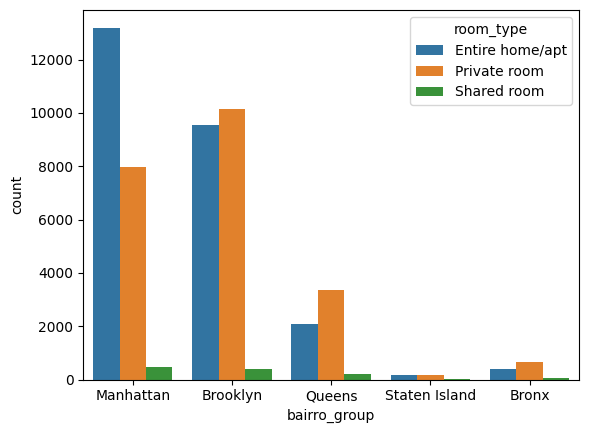

In [66]:
sns.countplot(x='bairro_group', hue='room_type', data=df)

In [67]:
#Visualização dos dados quanto ao local e o preço
bairro_group = df[['bairro_group','price']]
bairro_group.groupby(['bairro_group']).agg(['min', 'max','sum','mean'])

price                            
                min    max      sum        mean
bairro_group                                   
Bronx             0   2500    95459   87.496792
Brooklyn          0  10000  2500451  124.381983
Manhattan         0  10000  4264527  196.875814
Queens           10  10000   563867   99.517649
Staten Island    13   5000    42825  114.812332

In [68]:
#Percentual de cada categoria do tipo | multi categorias
df['bairro'].value_counts(normalize=True)

bairro
Williamsburg          0.080173
Bedford-Stuyvesant    0.075960
Harlem                0.054362
Bushwick              0.050415
Upper West Side       0.040312
                        ...   
Fort Wadsworth        0.000020
Richmondtown          0.000020
New Dorp              0.000020
Rossville             0.000020
Willowbrook           0.000020
Name: proportion, Length: 221, dtype: float64

In [69]:
#Percentual de cada categoria do tipo | multi categorias, os cinco primeiro usuário representam 3,52% dos registros.
df['host_name'].value_counts(normalize=True)

host_name
Michael              0.008532
David                0.008246
Sonder (NYC)         0.006691
John                 0.005995
Alex                 0.005709
                       ...   
Rhonycs              0.000020
Brandy-Courtney      0.000020
Shanthony            0.000020
Aurore And Jamila    0.000020
Ilgar & Aysel        0.000020
Name: proportion, Length: 11452, dtype: float64

### Processamento de texto

In [70]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\julia\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\julia\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\julia\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [71]:
#Visualização dos dados quanto ao local e o preço
nome = df[['nome','price']]
#bairro_group.groupby(['bairro_group']).agg(['min', 'max','sum','mean'])

In [72]:
acima_1000 = nome.loc[nome['price'] >= 1000].sort_values(by='price',ascending = False)

In [73]:
acima_1000.shape

(298, 2)

In [74]:
def clean_function(df, column_text):
    df[f'{column_text}_cleaned'] = df[[f'{column_text}']]\
    .replace(regex=r'[!/,.-]',value='')\
    .apply(lambda x: x.astype(str).str.lower())\
    .apply(lambda x:x.astype(str).str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8'))
    return df

In [75]:
def stop_words_function(df, column_name, new_column_name):
    stop_words = stopwords.words('English')
    df[new_column_name] = df[column_name].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
    return df

In [76]:
def tokenization (df,column_name, new_column_name):
    df[new_column_name] = df[column_name].map(lambda x: word_tokenize(x))
    return df

In [77]:
# Aplicação das funções
acima_1000_sw = stop_words_function(acima_1000, 'nome', 'nome_stop_word')
acima_1000_tk = tokenization(acima_1000_sw, 'nome_stop_word', 'nome_token')

In [78]:
#Transforma a lista de listas em uma única lista
palavras = sum(acima_1000_tk['nome_token'], [])

# Cria uma série a partir da lista
serie_palavras = pd.Series(palavras)

# Conta a frequência de cada palavra
frequencia = serie_palavras.value_counts()

In [79]:
# Limpeza de simbolos e números
frequencia = frequencia.drop(labels=[',', '!', '-',')','(','2','.','&'])

In [80]:
frequencia.head(20)

Luxury       28
Townhouse    27
Private      25
Loft         25
Park         20
NYC          19
Bedroom      17
Village      17
Manhattan    16
East         16
apartment    15
West         15
Central      14
Brooklyn     13
Airbnb       13
Beautiful    13
bedroom      13
New          12
Hidden       12
Penthouse    12
Name: count, dtype: int64

### Pré-processamento

In [108]:
## Transformação das variáveis categorias em booleanas

In [109]:
#Transformação do atributo 'room_type' de nominal para discreto
df0 = pd.get_dummies(df, columns=['room_type'], prefix=['room_type'])
df0 = pd.get_dummies(df0, columns=['bairro_group'],prefix=['bairro'])

In [110]:
#nome das colunas
df0.columns

Index(['id', 'nome', 'host_id', 'host_name', 'bairro', 'latitude', 'longitude',
       'price', 'minimo_noites', 'numero_de_reviews', 'ultima_review',
       'reviews_por_mes', 'calculado_host_listings_count',
       'disponibilidade_365', 'room_type_Entire home/apt',
       'room_type_Private room', 'room_type_Shared room', 'bairro_Bronx',
       'bairro_Brooklyn', 'bairro_Manhattan', 'bairro_Queens',
       'bairro_Staten Island'],
      dtype='object')

In [111]:
#Correção do nome das colunas com caracteres especiais e espaços
df0.rename(columns={'room_type_Entire home/apt': 'room_type_Entire_home_apt', 'room_type_Private room':'room_type_Privat_room', 'room_type_Shared room':'room_type_Shared_room', 'bairro_Staten Island':'bairro_Staten_Island'}, inplace = True)

In [112]:
#Seleção das colunas com valores quanttativos
df0 = df0[['minimo_noites','numero_de_reviews', 'disponibilidade_365','calculado_host_listings_count','price', 'reviews_por_mes','room_type_Entire_home_apt', 'room_type_Privat_room', 'room_type_Shared_room','bairro_Bronx','bairro_Brooklyn', 'bairro_Manhattan', 'bairro_Queens','bairro_Staten_Island','latitude','longitude' ]]

### Tratamento dos dados faltantes e outlier

In [113]:
dados = df0

In [114]:
# Conta a frequência de cada palavra
disponibilidade = dados.disponibilidade_365.value_counts()
disponibilidade

disponibilidade_365
0      17533
365     1294
364      491
1        408
89       361
       ...  
195       26
183       24
196       24
181       23
202       20
Name: count, Length: 366, dtype: int64

In [115]:
dados.describe()

,minimo_noites,numero_de_reviews,disponibilidade_365,calculado_host_listings_count,price,reviews_por_mes,latitude,longitude
count,48894.000000,48894.000000,48894.000000,48894.000000,48894.000000,38842.000000,48894.000000,48894.000000
mean,7.030085,23.274758,112.776169,7.144005,152.720763,1.373251,40.728951,-73.952169
std,20.510741,44.550991,131.618692,32.952855,240.156625,1.680453,0.054529,0.046157
min,1.000000,0.000000,0.000000,1.000000,0.000000,0.010000,40.499790,-74.244420
25%,1.000000,1.000000,0.000000,1.000000,69.000000,0.190000,40.690100,-73.983070
50%,3.000000,5.000000,45.000000,1.000000,106.000000,0.720000,40.723075,-73.955680
75%,5.000000,24.000000,227.000000,2.000000,175.000000,2.020000,40.763117,-73.936273
max,1250.000000,629.000000,365.000000,327.000000,10000.000000,58.500000,40.913060,-73.712990


In [116]:
# conferencia dados faltantes
dados.isna().sum() 

minimo_noites                        0
numero_de_reviews                    0
disponibilidade_365                  0
calculado_host_listings_count        0
price                                0
reviews_por_mes                  10052
room_type_Entire_home_apt            0
room_type_Privat_room                0
room_type_Shared_room                0
bairro_Bronx                         0
bairro_Brooklyn                      0
bairro_Manhattan                     0
bairro_Queens                        0
bairro_Staten_Island                 0
latitude                             0
longitude                            0
dtype: int64

In [117]:
#Preenchimento dos reviews por mês no valor aleatório entre 0.01 e 1
dados['reviews_por_mes']=df0['reviews_por_mes'].fillna(value=random.uniform(0.01, 1))

In [118]:
#Substituir zero por 365
for i in range(0,len(dados.disponibilidade_365)):
    if (dados['disponibilidade_365'][i] == 0):
        dados['disponibilidade_365'][i] = 365

In [119]:
#dimensão do dataset
dados.shape

(48894, 16)

In [120]:
#Exclusão dos valores com preço superior a 500 e 0
dados = dados[~(dados['price'] > 500)]
dados = dados[~(dados['price'] == 0)]

In [121]:
#Exclusão do minimo de noites maior que 15
dados = dados[~(dados['minimo_noites'] > 10)]

In [135]:
#Exclusão do numero_de_reviews maior que 100 e zero
dados = dados[~(dados['numero_de_reviews'] > 100)]
dados = dados[~(dados['numero_de_reviews'] ==0)]

In [123]:
#Exclusão do reviews_por_mes maior que 10
#dados = dados[~(dados['reviews_por_mes'] >10)]

In [136]:
#dimensão do dataset
dados.shape

(31318, 16)

In [137]:
# A correlação após os ajustes dos dados
dados.corr()["price"].sort_values(ascending = False)

price                            1.000000
room_type_Entire_home_apt        0.572529
bairro_Manhattan                 0.297992
calculado_host_listings_count    0.118009
minimo_noites                    0.071660
latitude                         0.053642
reviews_por_mes                 -0.013372
numero_de_reviews               -0.029052
disponibilidade_365             -0.036054
bairro_Staten_Island            -0.043885
bairro_Bronx                    -0.090260
room_type_Shared_room           -0.123614
bairro_Queens                   -0.154543
bairro_Brooklyn                 -0.156894
longitude                       -0.282587
room_type_Privat_room           -0.536201
Name: price, dtype: float64

In [138]:
dados.describe()

,minimo_noites,numero_de_reviews,disponibilidade_365,calculado_host_listings_count,price,reviews_por_mes,latitude,longitude
count,31318.000000,31318.000000,31318.000000,31318.000000,31318.000000,31318.000000,31318.000000,31318.000000
mean,2.721406,18.993390,235.734625,3.796028,128.923814,1.274939,40.727399,-73.949742
std,1.806880,23.054615,140.419172,24.754499,85.907216,1.539901,0.055942,0.047894
min,1.000000,1.000000,1.000000,1.000000,10.000000,0.010000,40.506410,-74.244420
25%,1.000000,3.000000,87.000000,1.000000,67.000000,0.190000,40.688160,-73.981840
50%,2.000000,9.000000,308.000000,1.000000,100.000000,0.700000,40.720250,-73.953920
75%,3.000000,26.000000,365.000000,2.000000,165.000000,1.870000,40.762837,-73.932903
max,10.000000,100.000000,365.000000,327.000000,500.000000,27.950000,40.913060,-73.712990


### Histograma dos dados 

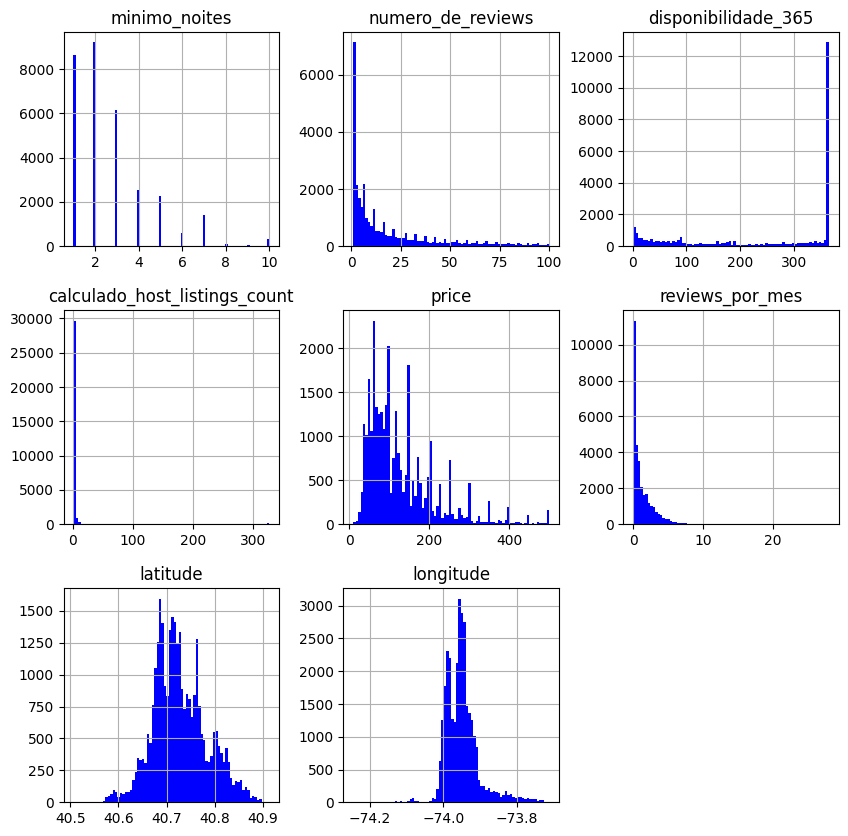

In [139]:
#Verificação da curva normal dos dados
dados.hist(bins=80, figsize=(10,10),color="blue"); plt.show()

### Regressão 

In [140]:
#DADOS DAS VARIÁVEIS INDEPENDENTES
X = dados.drop(["price"], axis = 1)

#DADOS DA VARIÁVEL DEPENDENTE, QUE QUEREMOS ENCONTRAR
y = dados["price"]

#DIVISÃO DO DATA FRAME EM TEST E TREINAMENTO 70% TREINAMENTO E 80% TESTE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.35, random_state=30)

In [141]:
print(f"X_train dimensões {X_train.shape} e tamanho {X_train.size}")
print(f"X_test dimensões {X_test.shape} e tamanho {X_test.size}")
print(f"y_train dimensões {y_train.shape} e tamanho {y_train.size}")
print(f"y_test dimensões {y_test.shape} e tamanho {y_test.size}")

X_train dimensões (20356, 15) e tamanho 305340
X_test dimensões (10962, 15) e tamanho 164430
y_train dimensões (20356,) e tamanho 20356
y_test dimensões (10962,) e tamanho 10962


In [142]:
# Criando o modelo LinearRegression()
regLinear = LinearRegression()
# Realizar treinamento do modelo
regLinear.fit(X_train, y_train)
# Realizar predição com os dados separados para teste
pred_regLinear = regLinear.predict(X_test)

In [143]:
#intercept
iRG = (regLinear.intercept_)
print("Intercept: "+str(iRG))
# Visualização dos 03 primeiros resultados
print(f'Predição amostra de 3: {pred_regLinear[:3]}')
#Mean absolute error
maeRG = mean_absolute_error(y_test, pred_regLinear)
print('Erro absoluto médio (MAE): %.2f' % maeRG)
#Mean squared error
mRG = mean_squared_error(y_test, pred_regLinear)
print('Erro quadrado médio (MSE): %.2f' % mRG)
# R2
r2RG = r2_score(y_test, pred_regLinear)
print('R2: %.6f' % r2RG)

Intercept: -16193.255977498979
Predição amostra de 3: [ 38.58261609 125.19828191 159.96021222]
Erro absoluto médio (MAE): 44.39
Erro quadrado médio (MSE): 4277.74
R2: 0.417041


In [144]:
y_test = np.array(y_test)

### Modelo RandomForestRegressor()

In [145]:
forest_reg = RandomForestRegressor(n_estimators=30,random_state=10)
forest_reg.fit(X_train , y_train)
y_pred_forest = forest_reg.predict(X_test)

In [146]:
#intercept
#não possui intercepr
iRF = 0
# Visualização dos 03 primeiros resultados
print(f'Predição amostra de 3: {y_pred_forest[:3]}')
#Mean absolute error
maeRF = mean_absolute_error(y_test, y_pred_forest)
print('Erro absoluto médio (MAE): %.2f' % maeRF)
#Mean squared error
mRF = mean_squared_error(y_test, y_pred_forest)
print('Erro quadrado médio (MSE): %.2f' % mRF)
# R2
r2RF = r2_score(y_test, y_pred_forest)
print('R2: %.6f' % r2RF)

Predição amostra de 3: [ 32.9        156.66666667 112.46666667]
Erro absoluto médio (MAE): 40.63
Erro quadrado médio (MSE): 3694.49
R2: 0.496525


### Novo Valor

{'id': 2595,
 'nome': 'Skylit Midtown Castle',
 'host_id': 2845,
 'host_name': 'Jennifer',
 'bairro_group': 'Manhattan',
 'bairro': 'Midtown',
 'latitude': 40.75362,
 'longitude': -73.98377,
 'room_type': 'Entire home/apt',
 'price': 225,
 'minimo_noites': 1,
 'numero_de_reviews': 45,
 'ultima_review': '2019-05-21',
 'reviews_por_mes': 0.38,
 'calculado_host_listings_count': 2,
 'disponibilidade_365': 355}

In [170]:
obj = {'minimo_noites': [1],
       'numero_de_reviews': [45],
        'disponibilidade_365': [355],
       'calculado_host_listings_count': [2],
       'price': [225],
        'reviews_por_mes': [0.38],
       'room_type_Entire_home_apt': True,
        'room_type_Privat_room':False,
       'room_type_Shared_room':False,
       'bairro_Bronx':False,
       'bairro_Brooklyn':False,
    'bairro_Manhattan': True,       
        'bairro_Queens':False,
        'bairro_Staten_Island':False,
 'latitude': [40.75362],
 'longitude': [-73.98377]
}

In [171]:
teste = pd.DataFrame(obj)

In [172]:
teste

,minimo_noites,numero_de_reviews,disponibilidade_365,calculado_host_listings_count,price,reviews_por_mes,room_type_Entire_home_apt,room_type_Privat_room,room_type_Shared_room,bairro_Bronx,bairro_Brooklyn,bairro_Manhattan,bairro_Queens,bairro_Staten_Island,latitude,longitude
0,1,45,355,2,225,0.38,True,False,False,False,False,True,False,False,40.75362,-73.98377


In [173]:
#DADOS DAS VARIÁVEIS INDEPENDENTES
X01 = teste.drop(["price"], axis = 1)

#DADOS DA VARIÁVEL DEPENDENTE, QUE QUEREMOS ENCONTRAR
y = teste["price"]

In [174]:
y01 = forest_reg.predict(X01)

In [175]:
#Valor da Previsão
y01

array([257.4])

In [181]:
#Valor da Real
y


0    225
Name: price, dtype: int64

In [176]:
import pickle

with open("modelo.pkl", "wb") as arquivo:
	pickle.dump(forest_reg,arquivo)

In [ ]:
###### Fonte: https://gomesguilherme.medium.com/guia-inicial-de-pr%C3%A9-processamento-de-texto-utilizando-python-10950eac2ffe